# White Box - Supervised ML Project
__Name:__ Abdulrahman

__Topic Name:__ Regression Topic

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
A gaming company needs to predict which video games will be successful in the global market to optimize their development and marketing investments.The output is expected to be explained to a non-technical audience.

### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [2]:
df = pd.read_csv('vgsales.csv')
dataset = df

In [3]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
dataset.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
dataset[dataset['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [8]:
dataset[dataset['Publisher'].isnull()]['Name']

470                             wwe Smackdown vs. Raw 2006
1303                                        Triple Play 99
1662          Shrek / Shrek 2 2-in-1 Gameboy Advance Video
2222                                    Bentley's Hackpack
3159     Nicktoons Collection: Game Boy Advance Video V...
3166     SpongeBob SquarePants: Game Boy Advance Video ...
3766     SpongeBob SquarePants: Game Boy Advance Video ...
4145                                    Sonic the Hedgehog
4526     The Fairly Odd Parents: Game Boy Advance Video...
4635     The Fairly Odd Parents: Game Boy Advance Video...
5302         Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)
5647     Cartoon Network Collection: Game Boy Advance V...
6272     The Legend of Zelda: The Minish Cap(weekly JP ...
6437              Sonic X: Game Boy Advance Video Volume 1
6562     Dora the Explorer: Game Boy Advance Video Volu...
6648     Cartoon Network Collection: Game Boy Advance V...
6849        All Grown Up!: Game Boy Advance Video Volume

In [9]:
dataset['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [10]:
dataset['Publisher'].value_counts()[lambda x: x > 200]

Publisher
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Name: count, dtype: int64

In [11]:
dataset['Publisher'].value_counts()[lambda x: x < 100]

Publisher
Majesco Entertainment    92
LucasArts                90
Rising Star Games        86
Hudson Soft              81
Banpresto                73
                         ..
Media Entertainment       1
New World Computing       1
Genterprise               1
Rain Games                1
UIG Entertainment         1
Name: count, Length: 549, dtype: int64

In [12]:
dataset['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [13]:
dataset['Publisher'].value_counts()[lambda x: x > 200]

Publisher
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Name: count, dtype: int64

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [14]:
#dataset['Publisher'].fillna(value='Unknown', inplace=True)
#dataset.isnull().sum()

In [15]:
dataset.drop(columns='Year',axis=1 , inplace = True)

In [16]:
#dataset['test_publish'] = dataset['Publisher']

In [17]:
dataset['Publisher'].dropna(axis=0)

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16540, dtype: object

In [18]:
dataset.columns

Index(['Rank', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

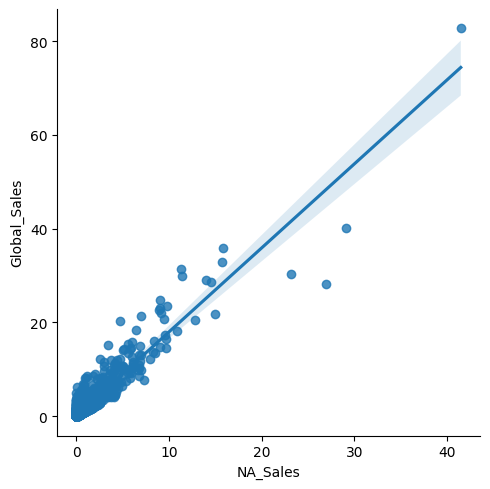

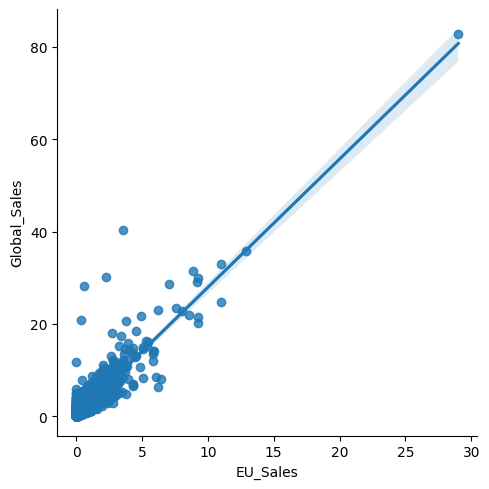

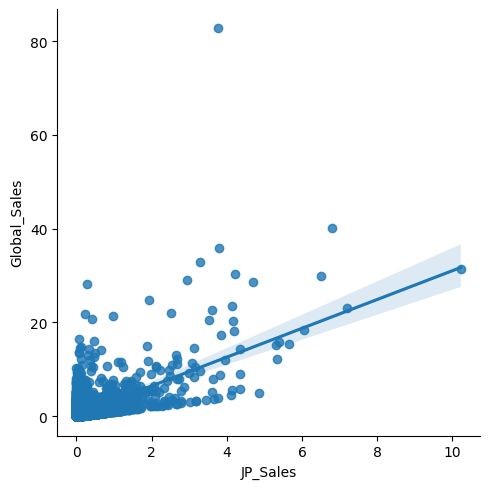

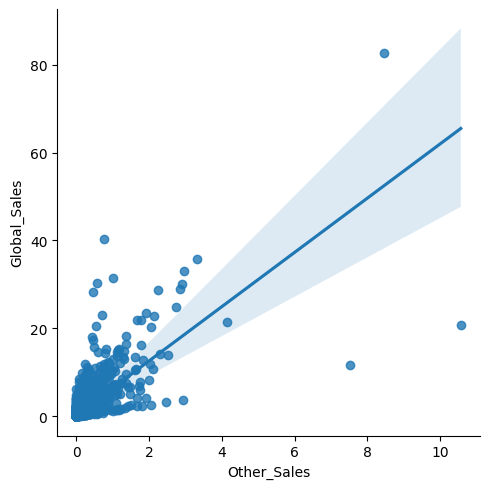

In [19]:
sns.lmplot(x='NA_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='EU_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='JP_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='Other_Sales', y='Global_Sales', data=dataset)
plt.show()

In [20]:
# remove it
dataset[dataset['Global_Sales'] >=70]

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [21]:
# remove it
dataset[dataset['JP_Sales'] >=9]

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


In [22]:
# Remove the outliers
dataset = dataset[dataset['Global_Sales']  < 40]
dataset = dataset[dataset['JP_Sales'] < 9]

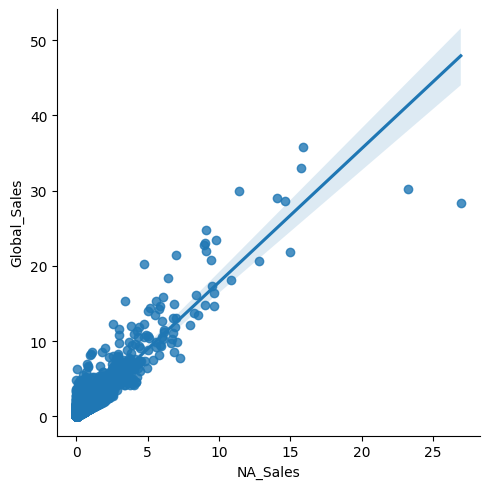

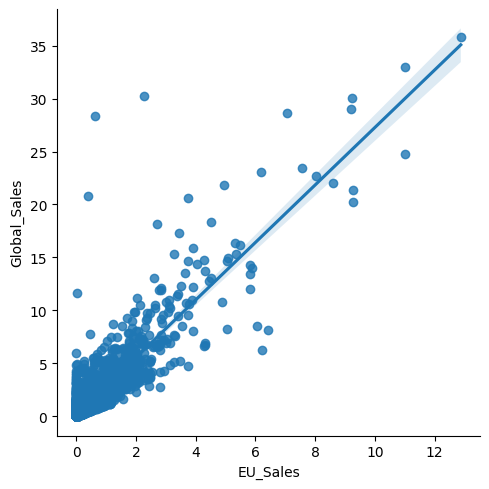

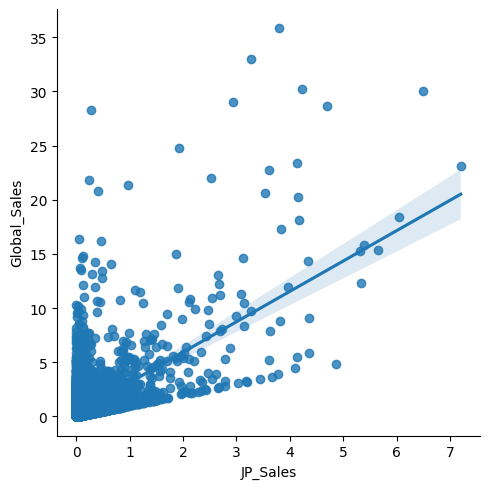

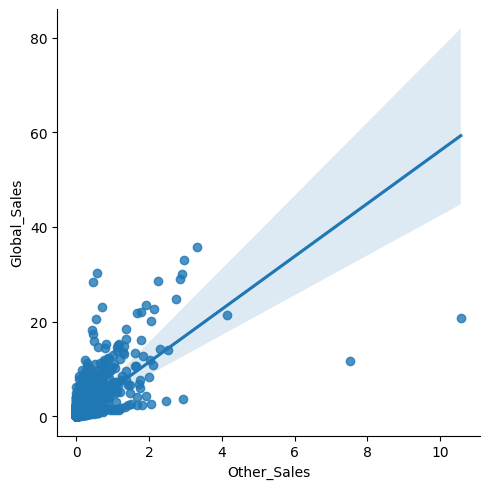

In [23]:
sns.lmplot(x='NA_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='EU_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='JP_Sales', y='Global_Sales', data=dataset)
plt.show()

sns.lmplot(x='Other_Sales', y='Global_Sales', data=dataset)
plt.show()

In [24]:
for i in dataset.columns:
    print(f"{i}: {dataset[i].nunique()}")

Rank: 16595
Name: 11491
Platform: 31
Genre: 12
Publisher: 578
NA_Sales: 406
EU_Sales: 302
JP_Sales: 242
Other_Sales: 156
Global_Sales: 620


In [25]:
dataset['Publisher'].value_counts()[lambda x: x <= 20]

Publisher
ASCII Entertainment    20
Compile Heart          20
Taito                  19
City Interactive       19
Success                19
                       ..
Media Entertainment     1
New World Computing     1
Genterprise             1
Rain Games              1
UIG Entertainment       1
Name: count, Length: 492, dtype: int64

In [26]:
for i in dataset.columns:
    print(f"{i}: {dataset[i].nunique()}")

Rank: 16595
Name: 11491
Platform: 31
Genre: 12
Publisher: 578
NA_Sales: 406
EU_Sales: 302
JP_Sales: 242
Other_Sales: 156
Global_Sales: 620


In [27]:
publisher_counts = dataset['Publisher'].value_counts()
rare_publishers = publisher_counts[publisher_counts <= 20].index
dataset['Publisher'] = dataset['Publisher'].replace(rare_publishers, 'Other')

In [28]:
platform_counts = dataset['Platform'].value_counts()
rare_platforms = platform_counts[platform_counts < 10].index
dataset['Platform'] = dataset['Platform'].replace(rare_platforms, 'Other')

In [29]:
for i in dataset.columns:
    print(f"{i}: {dataset[i].nunique()}")

Rank: 16595
Name: 11491
Platform: 26
Genre: 12
Publisher: 87
NA_Sales: 406
EU_Sales: 302
JP_Sales: 242
Other_Sales: 156
Global_Sales: 620


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


<Axes: >

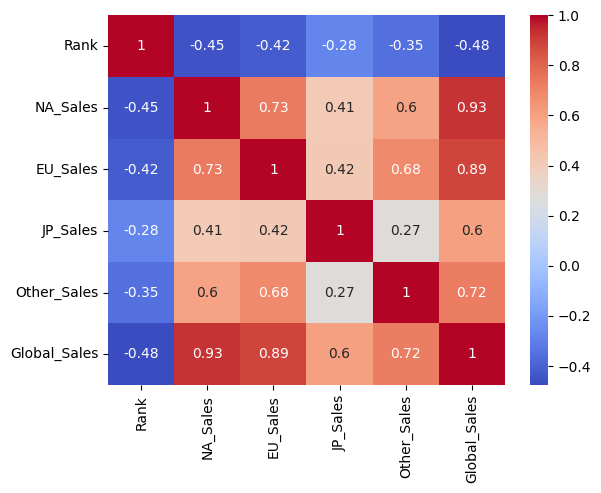

In [30]:
corre = dataset.corr(numeric_only=True)
sns.heatmap(corre , annot=True, cmap='coolwarm')

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [31]:
dataset_encoded = pd.get_dummies(dataset, columns=['Genre', 'Publisher','Platform'], drop_first=True)

In [32]:
dataset_encoded.drop(columns=['Name','Rank'], inplace = True)
dataset_encoded

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SNES,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
2,15.85,12.88,3.79,3.31,35.82,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.75,11.01,3.28,2.96,33.00,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,23.20,2.26,4.22,0.58,30.26,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,11.38,9.23,6.50,2.90,30.01,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,14.03,9.20,2.93,2.85,29.02,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16594,0.01,0.00,0.00,0.00,0.01,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16595,0.00,0.00,0.00,0.00,0.01,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16596,0.00,0.01,0.00,0.00,0.01,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [33]:
corre = dataset_encoded.corr()

In [34]:
high_corr = corre.where((corre >= 0.7) & (corre < 1.0)).stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr)

      Feature 1     Feature 2  Correlation
0      NA_Sales      EU_Sales     0.732996
1      NA_Sales  Global_Sales     0.928467
2      EU_Sales      NA_Sales     0.732996
3      EU_Sales  Global_Sales     0.889348
4   Other_Sales  Global_Sales     0.723589
5  Global_Sales      NA_Sales     0.928467
6  Global_Sales      EU_Sales     0.889348
7  Global_Sales   Other_Sales     0.723589


In [35]:
dataset_encoded.drop(columns=['NA_Sales','Other_Sales'] , inplace = True)

#### Train & Scalling 

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = dataset_encoded.drop(columns='Global_Sales')
y = dataset_encoded['Global_Sales']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

In [40]:
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

X_scaled = scaler.transform(X)  
y_scaled = y  

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear 
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [41]:
dataset_original = dataset.drop(columns=['Rank', 'Name' , 'Genre' ,'Publisher' ,'Platform'])
y = dataset_original['Global_Sales']
X = dataset_original.drop(columns=['Global_Sales'])

In [42]:
lr2 = LinearRegression()
lr2.fit(X, y)
y2_lr_pred = lr2.predict(X)

#### Using train split 

In [43]:
X_2 = dataset_encoded.drop('Global_Sales', axis=1)
y_2 = dataset_encoded['Global_Sales']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [46]:
# LINE assumption

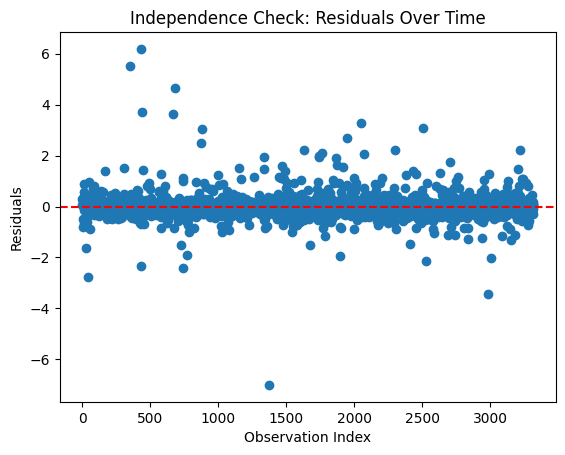

In [47]:
residuals = y_test - y_test_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.title("Independence Check: Residuals Over Time")
plt.show()

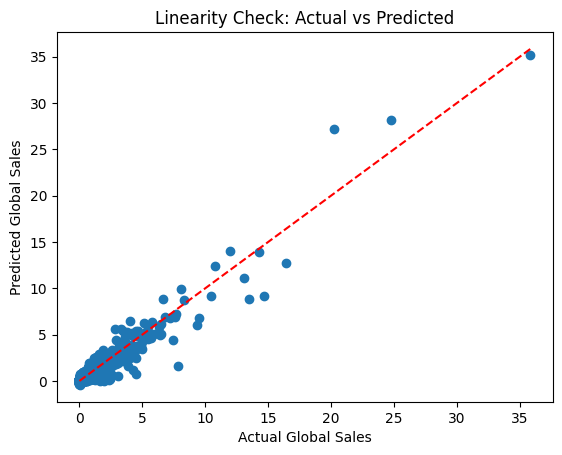

In [48]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Linearity Check: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.show()

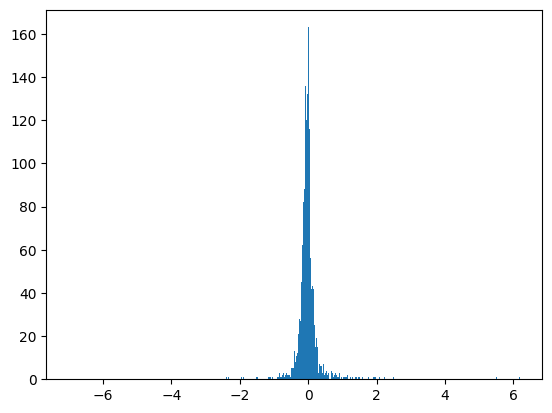

In [49]:
# N - Normality of errors: error is normally distributed, if not then maybe not linear 
plt.hist(residuals, bins=1000)
plt.show()

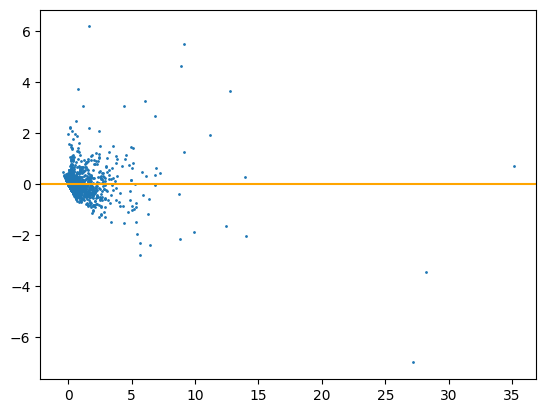

In [50]:
# E - Equal variance of errors: from 0 down range must be equal to above
plt.scatter(y_test_pred ,residuals, s=1)
plt.axhline(0, color='orange')

### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [52]:
X_2 = X

In [53]:
# Scale the full dataset
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X_2)
y_scaled_1 = y

In [54]:
# Fit KNN on full data
knn_1 = KNeighborsRegressor(n_neighbors=5, weights='uniform')  # You can tune this
knn_1.fit(X_scaled_1, y_scaled_1)

# Predict and evaluate
y_pred_knn_1 = knn_1.predict(X_scaled_1)
knn_1_r2 = r2_score(y_scaled_1, y_pred_knn_1)
knn_1_mse = mean_squared_error(y_scaled_1, y_pred_knn_1)

In [55]:
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

# Scale features
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [56]:
# Define parameter grid
param_grid = {'n_neighbors': list(range(1, 21))}

# Set up grid search
grid_2 = GridSearchCV(KNeighborsRegressor(weights='uniform'), param_grid, cv=5, scoring='r2')

# Fit to training data
grid_2.fit(X_train_scaled_2, y_train_2)

# Best parameters and score
print("Best k:", grid_2.best_params_['n_neighbors'])
print("Best R² score (CV):", grid_2.best_score_)

Best k: 2
Best R² score (CV): 0.9800558465057536


In [57]:
# Predict and evaluate
y_train_pred_knn_2 = grid_2.predict(X_train_scaled_2)
y_test_pred_knn_2 = grid_2.predict(X_test_scaled_2)

In [58]:
# R² scores
train_r2 = r2_score(y_train_2, y_train_pred_knn_2)
test_r2 = r2_score(y_test_2, y_test_pred_knn_2)

# MSE scores
train_mse = mean_squared_error(y_train_2, y_train_pred_knn_2)
test_mse_knn = mean_squared_error(y_test_2, y_test_pred_knn_2)

### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


### Linear multiple 


In [59]:
# For whole Dataset
mse_2_lr = mean_squared_error(y_2, y2_lr_pred)
mse_2_lr = round(mse_2_lr,3)
r2_lr = r2_score(y_2, y2_lr_pred)
print(f"Full MSE: {mse_2_lr}, R²: {r2_lr}")

Full MSE: 0.0, R²: 0.9999853348068635


In [60]:
# R² scores
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

# MSE scores
lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Train R²: {lr_train_r2:.2f}, Test R²: {lr_test_r2:.2f}")
print(f"Train MSE: {lr_train_mse:.2f}, Test MSE: {lr_test_mse:.2f}")

Train R²: 0.85, Test R²: 0.91
Train MSE: 0.27, Test MSE: 0.16


### KNN regressor


In [61]:
# KNN for whole Dataset
print(f"KNN_1 R² (whole data): {knn_1_r2:.2f}")
print(f"KNN_1 MSE (whole data): {knn_1_mse:.2f}")

KNN_1 R² (whole data): 0.99
KNN_1 MSE (whole data): 0.02


In [62]:
# Print results For Train Split KNN
print(f"Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse_knn:.2f}")

Train R²: 0.99, Test R²: 0.98
Train MSE: 0.01, Test MSE: 0.03


### Model Comparison
__Compare performance across models and versions__

- For KNN regressor when we did train test split got higher accuracy. But there are fear of overfitting so we need test it 